## Neural Network with a Single Output

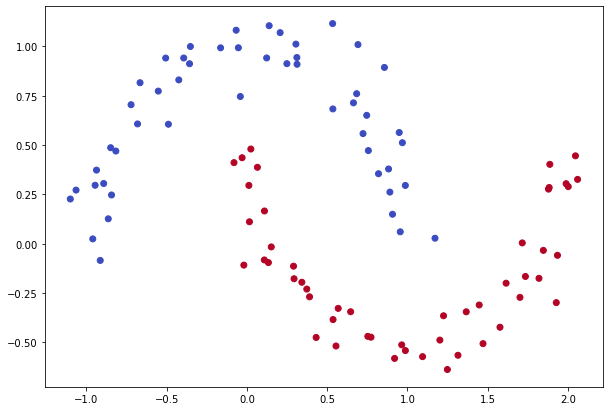

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed( 0 )
X, y = datasets.make_moons( 100 , noise= 0.10 )
x1 = X[:, 0 ]
x2 = X[:, 1 ]
plt.figure(figsize=( 10 , 7 ))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)

In [2]:
y = y.reshape(y.shape[ 0 ], 1 )

In [3]:
print (X.shape)
print (y.shape)

(100, 2)
(100, 1)


### Feed Forward

### Backpropagation

### Implementation with NumPy Library

In [8]:
def define_parameters (weights):
    weight_list = []
    bias_list = []
    for i in range (len (weights) - 1 ):

        w = np.random.randn(weights[i], weights[i+ 1 ])
        b = np.random.randn()

    weight_list.append(w)
    bias_list.append(b)
    return weight_list, bias_list

In [9]:
def sigmoid (x):
    return 1 /( 1 +np.exp(-x))

In [10]:
def sigmoid_der (x):
    return sigmoid(x)*( 1 -sigmoid(x))

In [11]:
def predictions (w, b, X):
    zh = np.dot(X,w[ 0 ]) + b[ 0 ]
    ah = sigmoid(zh)
    zo = np.dot(ah, w[ 1 ]) + b[ 1 ]
    ao = sigmoid(zo)
    return ao

In [12]:
def find_cost (ao,y):
    m = y.shape[ 0 ]
    total_cost = ( 1 /m) * np.sum(np.square(ao - y))
    return total_cost

In [13]:
def find_derivatives (w, b, X):
    zh = np.dot(X,w[ 0 ]) + b[ 0 ]
    ah = sigmoid(zh)
    zo = np.dot(ah, w[ 1 ]) + b[ 1 ]
    ao = sigmoid(zo)
    # Backpropagation phase 1
    m = y.shape[ 0 ]
    dcost_dao = ( 1 /m)*(ao-y)
    dao_dzo = sigmoid_der(zo)
    dzo_dwo = ah.T
    dwo= np.dot(dzo_dwo, dcost_dao * dao_dzo)
    dbo = np.sum(dcost_dao * dao_dzo)
    # Backpropagation phase 2
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah
    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = w[ 1 ].T
    dcost_dah = np.dot(dcost_dzo, dzo_dah)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)
    return dwh, dbh, dwo, dbo

In [14]:
def update_weights (w,b,dwh, dbh, dwo, dbo, lr):
    w[ 0 ] = w[ 0 ] - lr * dwh
    w[ 1 ] = w[ 1 ] - lr * dwo
    b[ 0 ] = b[ 0 ] - lr * dbh
    b[ 1 ] = b[ 1 ] - lr * dbo
    return w, b

In [15]:
def my_neural_network (X, y, lr, epochs):
    error_list = []
    input_len = X.shape[ 1 ]
    output_len = y.shape[ 1 ]
    w,b = define_parameters([input_len, 4 , output_len])
    for i in range (epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo, lr)
        if i % 50 == 0 :
            print (cost)
    return w, b, error_list

In [16]:
lr = 0.5
epochs = 2000
w, b, error_list = my_neural_network(X,y,lr,epochs)

ValueError: shapes (100,2) and (4,1) not aligned: 2 (dim 1) != 4 (dim 0)

In [17]:
plt.plot(error_list)

NameError: name 'error_list' is not defined

## Neural Network with Multiple Outputs

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed( 42 )
cat1 = np.random.randn( 800 , 2 ) + np.array([ 0 , - 3 ])
cat2 = np.random.randn( 800 , 2 ) + np.array([ 3 , 3 ])
cat3 = np.random.randn( 800 , 2 ) + np.array([- 3 , 3 ])
X = np.vstack([cat1, cat2, cat3])
labels = np.array([ 0 ]* 800 + [ 1 ]* 800 + [ 2 ]* 800 )
y = np.zeros(( 2400 , 3 ))
for i in range ( 2400 ):
    y[i, labels[i]] = 1

In [21]:
print (X.shape)
print (y.shape)

(2400, 2)
(2400, 3)


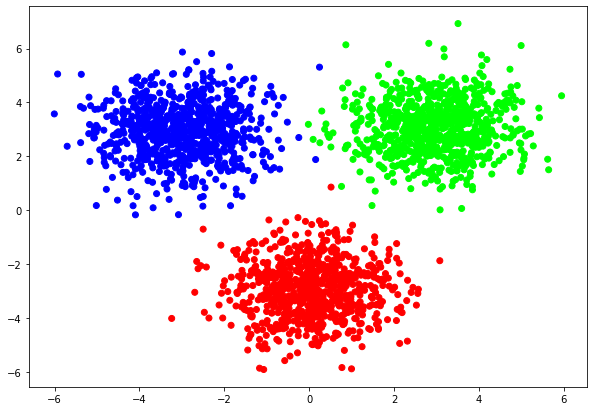

In [22]:
x1 = X[:, 0 ]
x2 = X[:, 1 ]
plt.figure(figsize=( 10 , 7 ))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)

### Implementation with NumPy Library

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed( 42 )
cat1 = np.random.randn( 800 , 2 ) + np.array([ 0 , - 3 ])
cat2 = np.random.randn( 800 , 2 ) + np.array([ 3 , 3 ])
cat3 = np.random.randn( 800 , 2 ) + np.array([- 3 , 3 ])
X = np.vstack([cat1, cat2, cat3])
labels = np.array([ 0 ]* 800 + [ 1 ]* 800 + [ 2 ]* 800 )
y = np.zeros(( 2400 , 3 ))

for i in range ( 2400 ):
    y[i, labels[i]] = 1
    
    
def define_parameters (weights):
    weight_list = []
    bias_list = []
    for i in range (len(weights) - 1 ):
        w = np.random.randn(weights[i], weights[i+ 1 ])
        b = np.random.randn()
    weight_list.append(w)
    bias_list.append(b)
    return weight_list, bias_list    

def softmax (X):
    expX = np.exp(X)
    return expX / expX.sum(axis= 1 , keepdims=True)

def sigmoid (x):
    return1 /( 1 + np.exp(-x))

def sigmoid_der (x):
    return sigmoid(x)*( 1 -sigmoid(x))

def predictions (w, b, X):
    zh = np.dot(X,w[ 0 ]) + b[ 0 ]
    ah = sigmoid(zh)
    zo = np.dot(ah, w[ 1 ]) + b[ 1 ]
    ao = softmax(zo)
    return ao

def find_cost (ao,y):
    total_cost = np.sum(-y * np.log(ao))
    return total_cost

def find_derivatives (w, b, X):
    zh = np.dot(X,w[ 0 ]) + b[ 0 ]
    ah = sigmoid(zh)
    zo = np.dot(ah, w[ 1 ]) + b[ 1 ]
    ao = softmax(zo)

    # Backpropagation phase 1
    dcost_dzo = (ao-y)
    dzo_dwo = ah.T
    dwo= np.dot(dzo_dwo, dcost_dzo)
    dbo = np.sum(dcost_dzo)
    # Backpropagation phase 2
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah
    dzo_dah = w[ 1 ].T
    dcost_dah = np.dot(dcost_dzo, dzo_dah)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)
    return dwh, dbh, dwo, dbo

def update_weights (w,b,dwh, dbh, dwo, dbo, lr):
    w[ 0 ] = w[ 0 ] - lr * dwh
    w[ 1 ] = w[ 1 ] - lr * dwo
    b[ 0 ] = b[ 0 ] - lr * dbh
    b[ 1 ] = b[ 1 ] - lr * dbo
    return w, b

def my_multiout_neural_network (X, y, lr, epochs):
    error_list = []
    input_len = X.shape[ 1 ]
    output_len = y.shape[ 1 ]
    w,b = define_parameters([input_len, 4 , output_len])
    for i in range (epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo, lr)
        if i % 50 == 0 :
            print (cost)
    return w, b, error_list
    
lr = 0.0005
epochs = 1000
w, b, error_list = my_multiout_neural_network(X,y,lr,epochs)    

ValueError: shapes (2400,2) and (4,3) not aligned: 2 (dim 1) != 4 (dim 0)

In [26]:
plt.plot(error_list)

NameError: name 'error_list' is not defined